# Import Required Libraries
Import libraries such as yfinance, pandas, matplotlib, statsmodels, and any custom functions for stationarity checks.

In [38]:
# Import necessary libraries
import yfinance as yf  # For downloading stock data
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
import statsmodels.api as sm  # For statistical modeling
from statsmodels.tsa.stattools import adfuller  # For stationarity checks

# Define a custom function for stationarity checks
def check_for_stationarity(series):
    """
    Perform the Augmented Dickey-Fuller test to check for stationarity.
    
    Parameters:
        series (pd.Series): Time series data to test.
    
    Returns:
        None: Prints the test statistic and p-value.
    """
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

# Download Historical Data
Use yfinance to fetch historical stock prices for Home Depot (HD) and Lowe's (LOW) over a specified time period.

In [39]:
# Define the time period for analysis
start_date = "2023-01-01"
end_date = "2024-01-01"

# Download closing prices for Home Depot (HD) and Lowe's (LOW)
HD = yf.download("HD", start=start_date, end=end_date)['Close']
LOW = yf.download("LOW", start=start_date, end=end_date)['Close']

# Display the first few rows of the downloaded data
print("Home Depot (HD) Stock Prices:")
print(HD.head())
print("\nLowe's (LOW) Stock Prices:")
print(LOW.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Home Depot (HD) Stock Prices:
Ticker              HD
Date                  
2023-01-03  298.117035
2023-01-04  301.721863
2023-01-05  297.701813
2023-01-06  299.645782
2023-01-09  299.910034

Lowe's (LOW) Stock Prices:
Ticker             LOW
Date                  
2023-01-03  190.490524
2023-01-04  192.739594
2023-01-05  192.146194
2023-01-06  192.337601
2023-01-09  190.873337


# Visualize the Price Series
Plot the closing prices of HD and LOW to visually inspect trends and relationships.

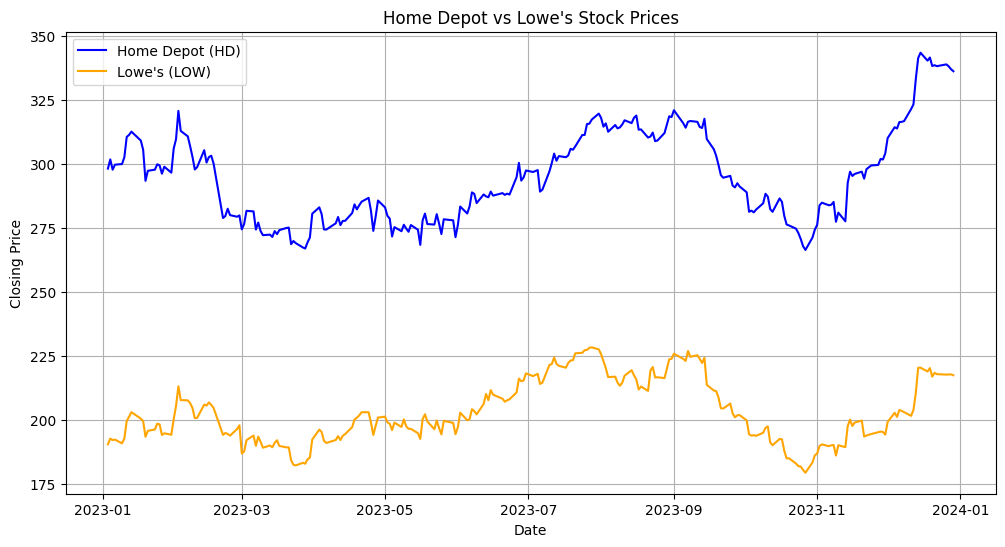

In [40]:
# Plot the closing prices of Home Depot (HD) and Lowe's (LOW)
plt.figure(figsize=(12, 6))
plt.plot(HD.index, HD.values, label="Home Depot (HD)", color="blue")
plt.plot(LOW.index, LOW.values, label="Lowe's (LOW)", color="orange")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Home Depot vs Lowe's Stock Prices")
plt.legend()
plt.grid(True)
plt.show()

# Check for Stationarity of the Raw Series
Apply the Augmented Dickey-Fuller (ADF) test to check if the price series for HD and LOW are non-stationary.

In [41]:
# Check for stationarity of the raw series using the custom function
print("Checking stationarity for Home Depot (HD):")
check_for_stationarity(HD)

print("\nChecking stationarity for Lowe's (LOW):")
check_for_stationarity(LOW)

Checking stationarity for Home Depot (HD):
ADF Statistic: -0.9798064968040049
p-value: 0.7605579858207488
Critical Values:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876

Checking stationarity for Lowe's (LOW):
ADF Statistic: -1.7566847181972503
p-value: 0.4021685130894159
Critical Values:
   1%: -3.457664132155201
   5%: -2.8735585105960224
   10%: -2.5731749894132916


# Compute Beta Using Linear Regression
Perform linear regression of one stock's price on the other to estimate the cointegration coefficient (beta).

In [42]:
# Perform linear regression to estimate beta (cointegration coefficient)
HD_const = sm.add_constant(HD)  # Add a constant term to the independent variable
results_HD_LOW = sm.OLS(LOW, HD_const).fit()  # Perform Ordinary Least Squares regression
beta_HD_LOW = results_HD_LOW.params['HD']  # Extract the beta coefficient

# Print the estimated beta
print("Estimated beta (HD/LOW):", beta_HD_LOW)

Estimated beta (HD/LOW): 0.5237664862773455


# Construct the I(0) Residual (Linear Combination)
Calculate the residuals from the regression, which represent the stationary linear combination of the two series.

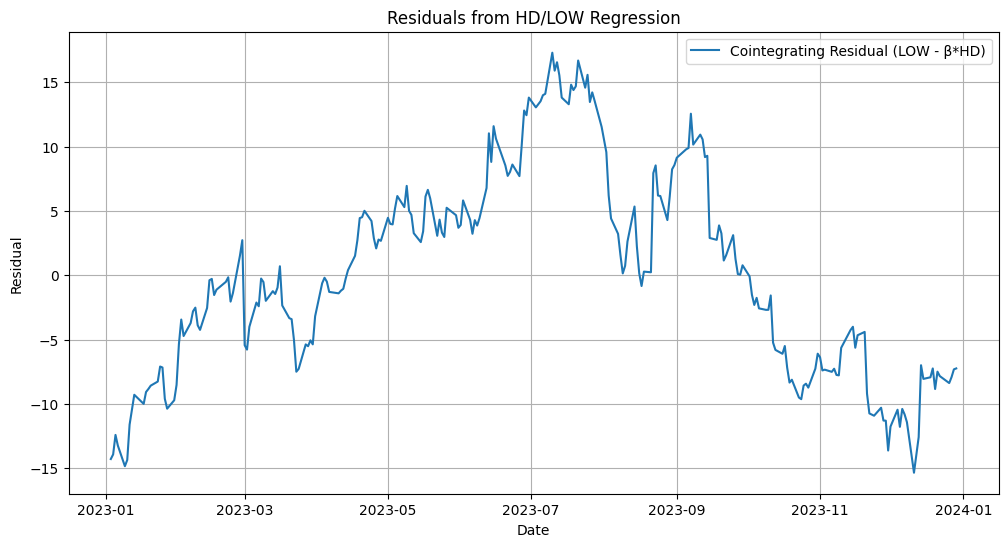

In [43]:
# Calculate the residuals (stationary linear combination) for Home Depot (HD) and Lowe's (LOW)
#Z_HD_LOW = (LOW - beta_HD_LOW * HD).squeeze()  # Residuals from the regression
#Z_HD_LOW.name = 'Residual HD/LOW'  # Name the residual series
residuals = results_HD_LOW.resid
residuals.name = "Cointegrating Residual (LOW - β*HD)"

# Plot the residuals to visually inspect mean-reversion
plt.figure(figsize=(12, 6))
#plt.plot(Z_HD_LOW.index, Z_HD_LOW.values, label='Residual HD/LOW', color="green")
plt.plot(residuals.index, residuals.values, label=residuals.name)
plt.xlabel("Date")
plt.ylabel("Residual")
plt.title("Residuals from HD/LOW Regression")
plt.legend()
plt.grid(True)
plt.show()

# Test for Stationarity of the Residuals
Use the ADF test on the residuals to confirm if they are stationary, indicating cointegration.

In [46]:
# Test for Stationarity of the Residuals
print("Testing stationarity for the residuals (HD/LOW):")
check_for_stationarity(residuals)

Testing stationarity for the residuals (HD/LOW):
ADF Statistic: -2.0547690893886834
p-value: 0.2630865579076222
Critical Values:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876


# Document Findings
Summarize the results, including the p-values from the ADF tests, and interpret whether HD and LOW are cointegrated.

In [48]:
# Document Findings

# Summarize the results of the ADF test for the residuals
adf_result = adfuller(residuals)
p_value = adf_result[1]  # Extract the p-value from the ADF test result

# Interpret the findings
if p_value < 0.05:
    conclusion = "The residuals are stationary (I(0)), indicating that Home Depot (HD) and Lowe's (LOW) are cointegrated."
else:
    conclusion = "The residuals are not stationary, indicating that Home Depot (HD) and Lowe's (LOW) are not cointegrated."

# Display the findings
print("Summary of Findings:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")
print("\nConclusion:")
print(conclusion)

Summary of Findings:
ADF Statistic: -2.0547690893886834
p-value: 0.2630865579076222
Critical Values:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876

Conclusion:
The residuals are not stationary, indicating that Home Depot (HD) and Lowe's (LOW) are not cointegrated.
